# House Sales King County
Dataset : kc_house_data.csv

Predict house prices using Linear Regression

## Import required libraries


In [1]:
library(ggplot2)
library(corrplot)
library(dplyr)
library(gvlma)

Warning message:
“package ‘corrplot’ was built under R version 3.4.2”corrplot 0.84 loaded
Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Read Input file

In [2]:

data.file = read.csv(file="Datasets/kc_house_data.csv", 
                     header = T, 
                     sep = ","
)
head(data.file)
str(data.file)
summary(data.file)

id         date            price   bedrooms bathrooms sqft_living sqft_lot
1 7129300520 20141013T000000  221900 3        1.00      1180          5650  
2 6414100192 20141209T000000  538000 3        2.25      2570          7242  
3 5631500400 20150225T000000  180000 2        1.00       770         10000  
4 2487200875 20141209T000000  604000 4        3.00      1960          5000  
5 1954400510 20150218T000000  510000 3        2.00      1680          8080  
6 7237550310 20140512T000000 1225000 4        4.50      5420        101930  
  floors waterfront view ⋯ grade sqft_above sqft_basement yr_built yr_renovated
1 1      0          0    ⋯  7    1180          0          1955        0        
2 2      0          0    ⋯  7    2170        400          1951     1991        
3 1      0          0    ⋯  6     770          0          1933        0        
4 1      0          0    ⋯  7    1050        910          1965        0        
5 1      0          0    ⋯  8    1680          0          1987        0        
6 1      0          0    ⋯ 11    3890       1530          2001        0        
  zipcode lat     long     sqft_living15 sqft_lot15
1 98178   47.5112 -122.257 1340            5650    
2 98125   47.7210 -122.319 1690            7639    
3 98028   47.7379 -122.233 2720            8062    
4 98136   47.5208 -122.393 1360            5000    
5 98074   47.6168 -122.045 1800            7503    
6 98053   47.6561 -122.005 4760          101930

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

## Data Preprocessing

### Drop ID Column

In [3]:
data.file$id = NULL

### Get Year and Month from Date variable and calcluated age

In [4]:
data.file$year_sold = as.numeric(substr(data.file$date,1,4))
data.file$yearmonth_sold = as.numeric(substr(data.file$date,1,6))
data.file$date = NULL
data.file$age_house = data.file$year_sold - ifelse(data.file$yr_renovated==0,data.file$yr_built,data.file$yr_renovated)
data.file$age_house.cat=cut(data.file$age_house, c(-1,10,15,20,25,30,Inf))

### Merging Zipcodes

In [5]:
data.file$cat.zipcode=cut(as.numeric(data.file$zipcode), c(-1,98020,98040,98060,98080,98100,98120,98140,98160,98180,98200,Inf))

In [6]:
unique(data.file$bathrooms)
unique(data.file$bedrooms)

[1] 1.00 2.25 3.00 2.00 4.50 1.50 2.50 1.75 2.75 3.25 4.00 3.50 0.75 4.75 5.00
[16] 4.25 3.75 0.00 1.25 5.25 6.00 0.50 5.50 6.75 5.75 8.00 7.50 7.75 6.25 6.50

[1]  3  2  4  5  1  6  7  0  8  9 11 10 33

### Converting required variables as factor

In [7]:
# colnames(data.file)
data.file$bedrooms = as.factor(data.file$bedrooms)
# data.file$bathrooms = as.factor(data.file$bathrooms)
data.file$floors = as.factor(data.file$floors)
data.file$waterfront = as.factor(data.file$waterfront)
data.file$view = as.factor(data.file$view)
data.file$condition = as.factor(data.file$condition)
data.file$grade = as.factor(data.file$grade)
#data.file$yr_renovated = as.factor(data.file$yr_renovated)
data.file$zipcode = as.factor(data.file$zipcode)
data.file$cat.zipcode = as.factor(data.file$cat.zipcode)
data.file$age_house.cat = as.factor(data.file$age_house.cat)

In [8]:
str(data.file)

'data.frame':	21613 obs. of  24 variables:
 $ price         : num  221900 538000 180000 604000 510000 ...
 $ bedrooms      : Factor w/ 13 levels "0","1","2","3",..: 4 4 3 5 4 5 4 4 4 4 ...
 $ bathrooms     : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living   : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot      : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors        : Factor w/ 6 levels "1","1.5","2",..: 1 3 1 1 1 1 3 1 1 3 ...
 $ waterfront    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ view          : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition     : Factor w/ 5 levels "1","2","3","4",..: 3 3 3 5 3 3 3 3 3 3 ...
 $ grade         : Factor w/ 12 levels "1","3","4","5",..: 6 6 5 6 7 10 6 6 6 6 ...
 $ sqft_above    : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement : int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built      : int  1955 1951 1933 1965 1987 2001 1995 1

### Merging levels of bathrooms

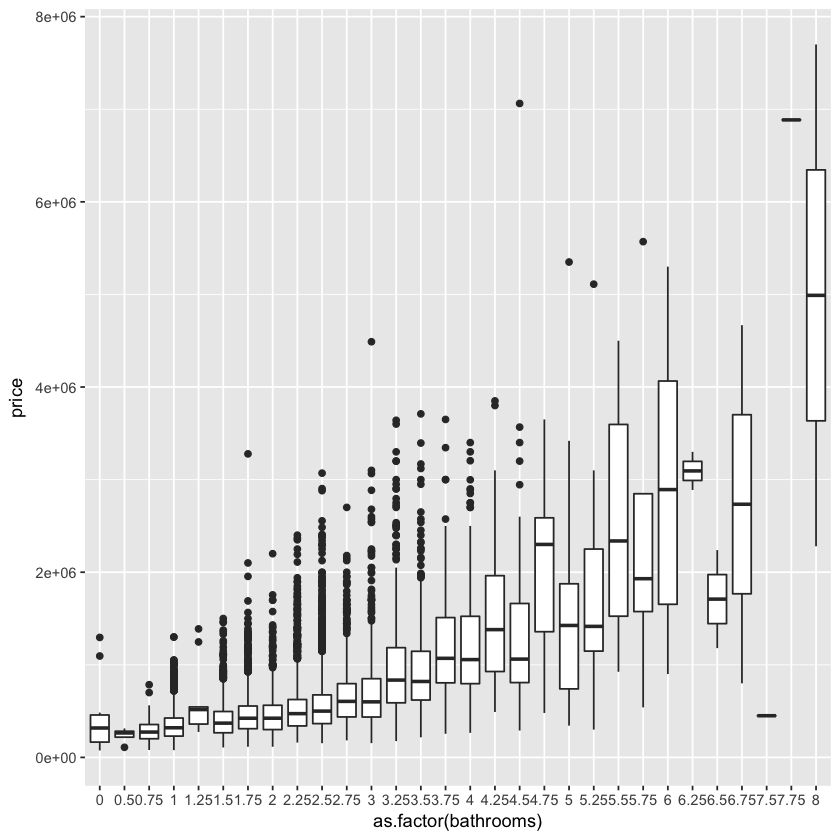

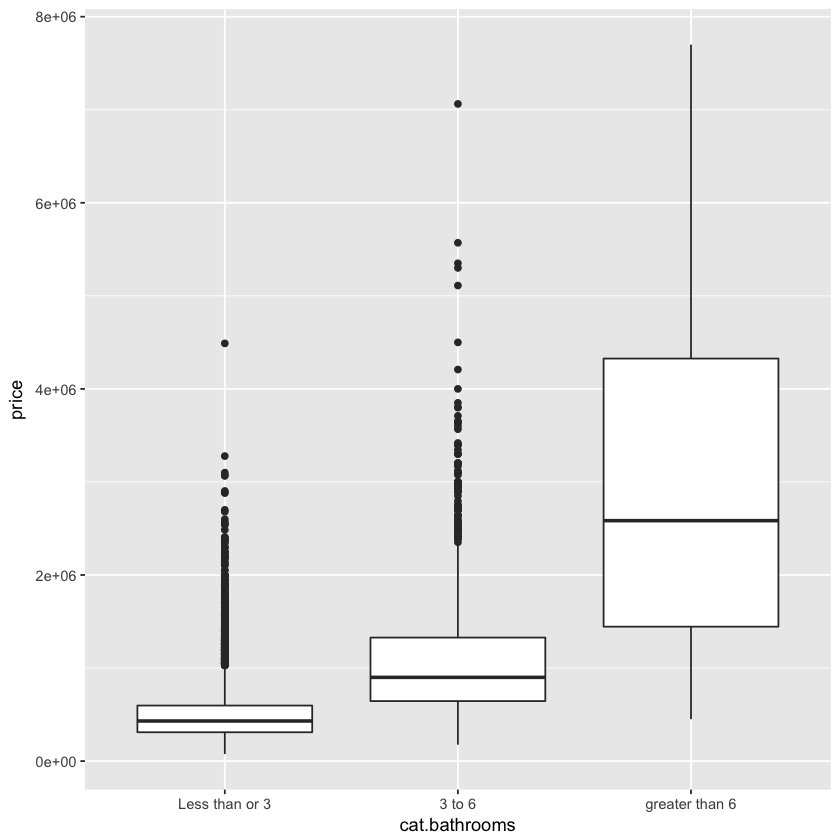

In [9]:
data.file$bathrooms = as.numeric(data.file$bathrooms)
ggplot(data.file,aes(as.factor(bathrooms),price))+geom_boxplot()
data.file$cat.bathrooms=cut(data.file$bathrooms, c(-1,3,6,Inf), c("Less than or 3","3 to 6","greater than 6"))
ggplot(data.file,aes(cat.bathrooms,price))+geom_boxplot()

## Test Train Split

In [10]:
set.seed(123)
sample = sample(1:nrow(data.file),size=0.7*nrow(data.file))
train.data.file = data.file[sample,]
test.data.file = data.file[-sample,]
nrow(data.file)
nrow(train.data.file)
nrow(test.data.file)

[1] 21613

[1] 15129

[1] 6484

## Data Transformation

Target variable normal distribution

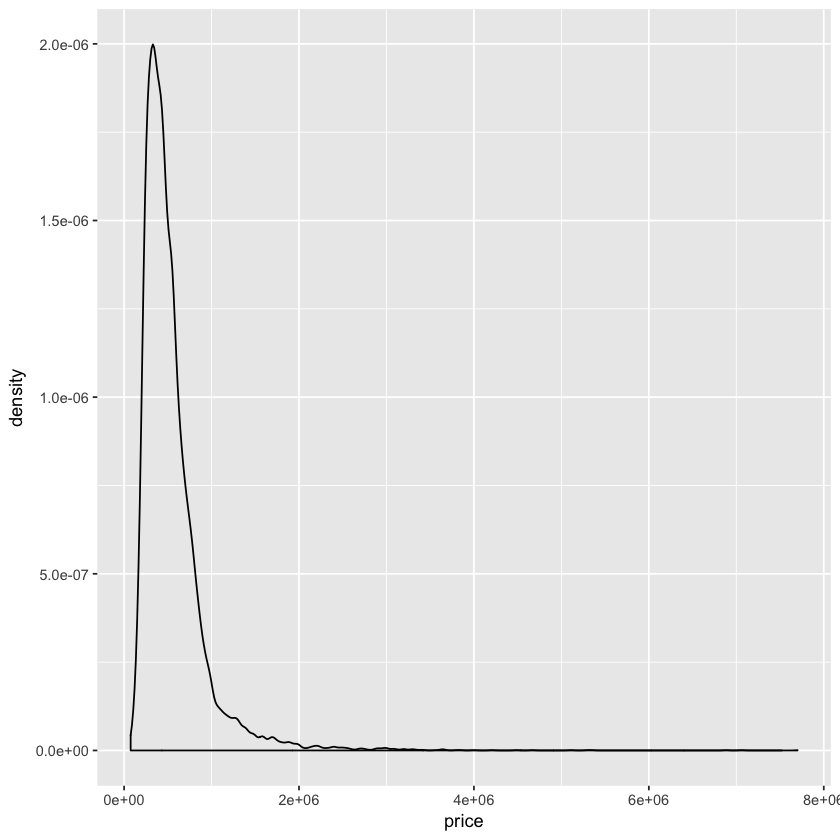

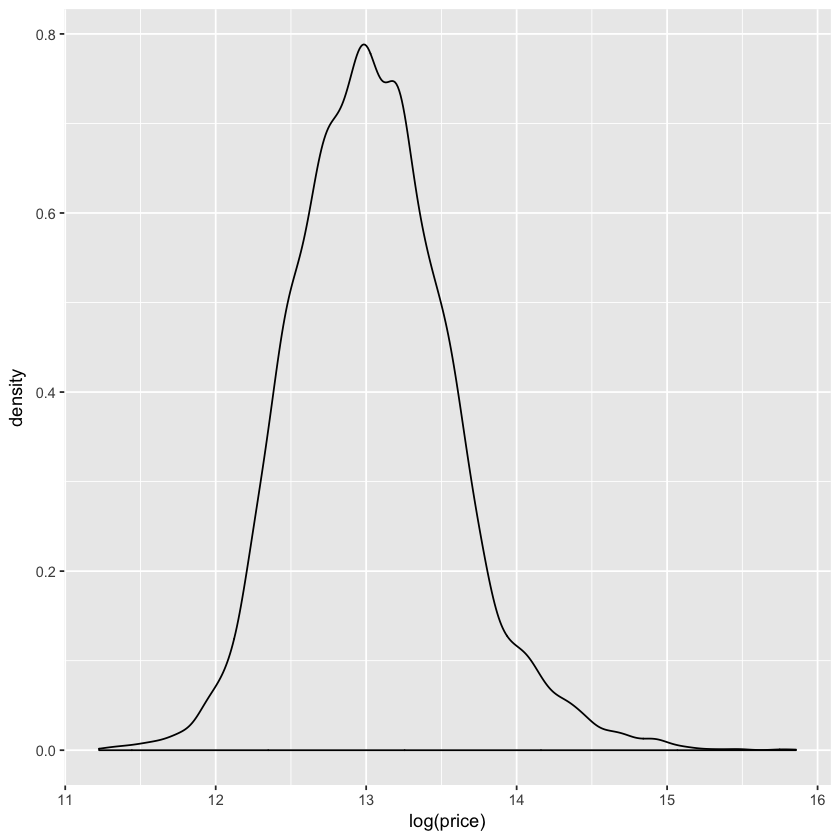

In [11]:
ggplot(train.data.file,aes(price))+geom_density()
ggplot(train.data.file,aes(log(price)))+geom_density()
train.data.file$price_log = log(train.data.file$price)

## Exploratory Data Analysis

### Cateogorical vs Target Variable

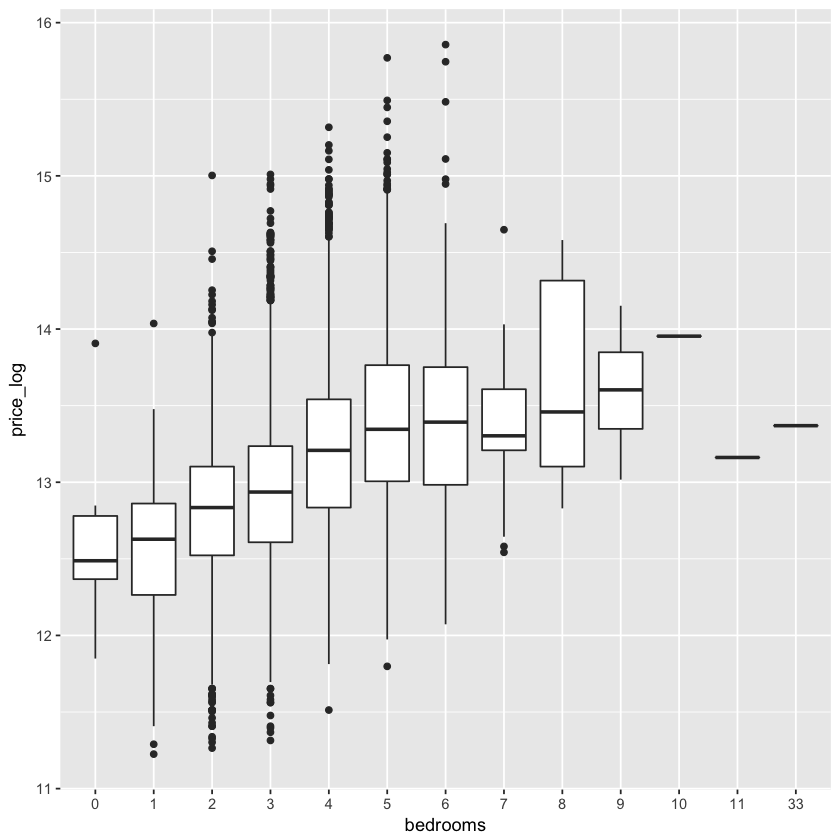

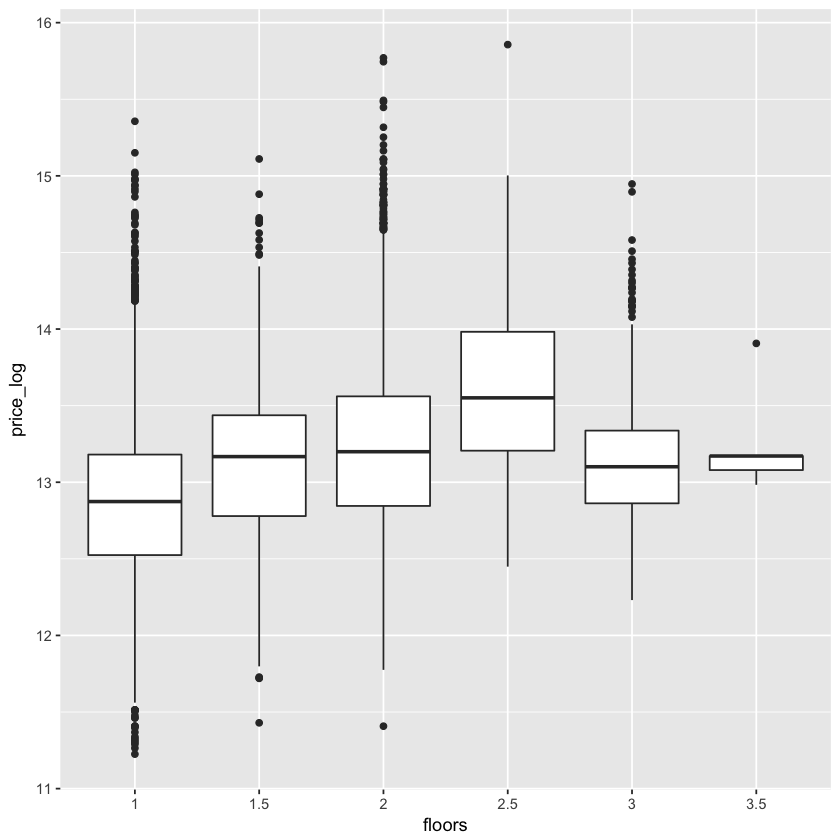

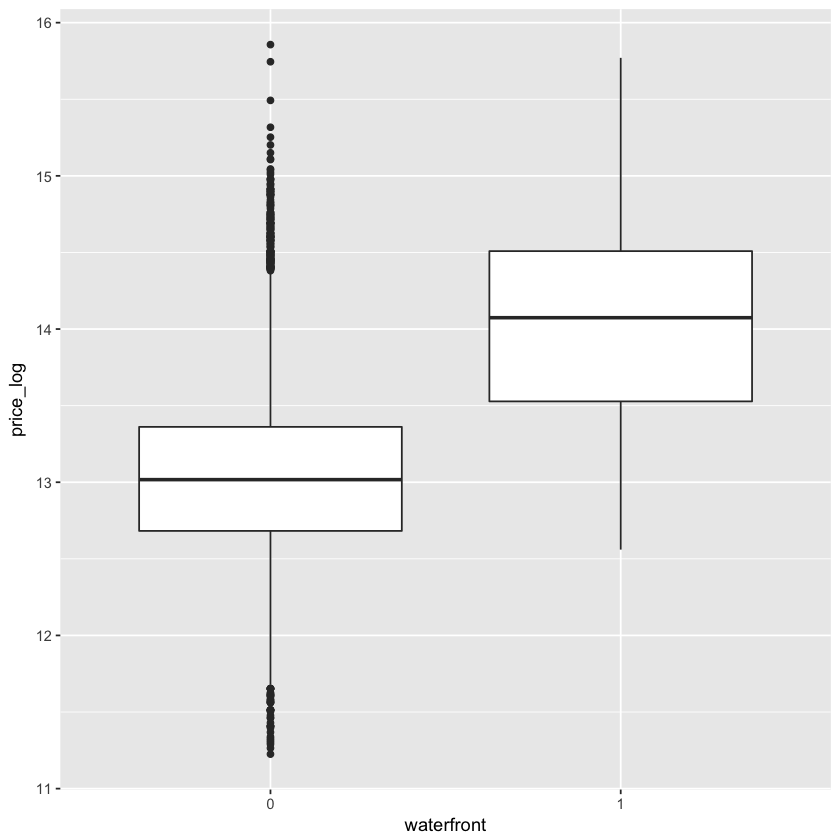

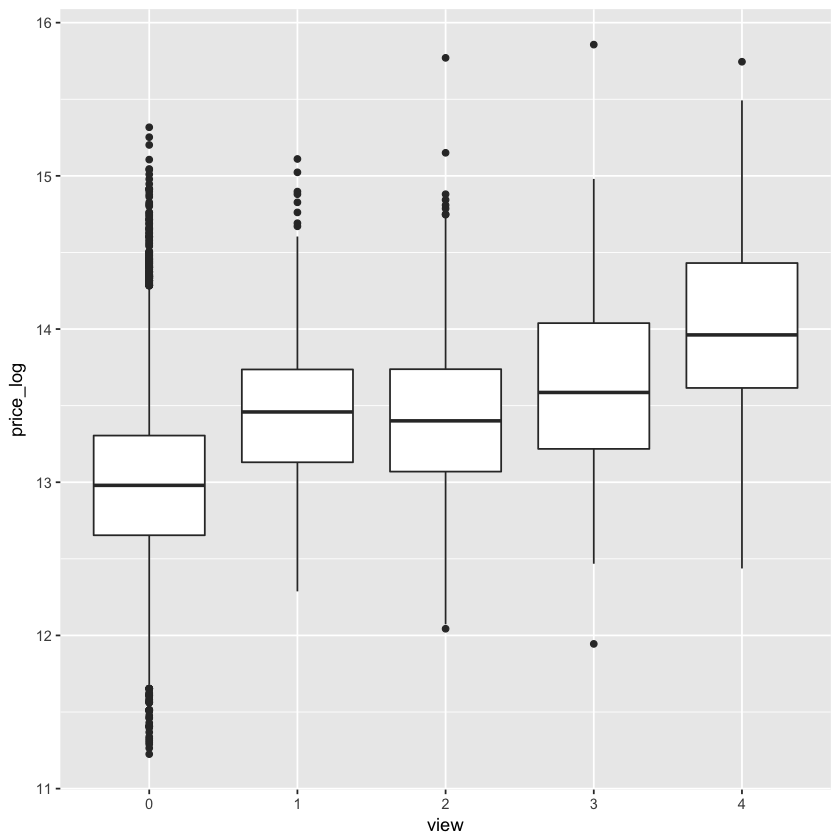

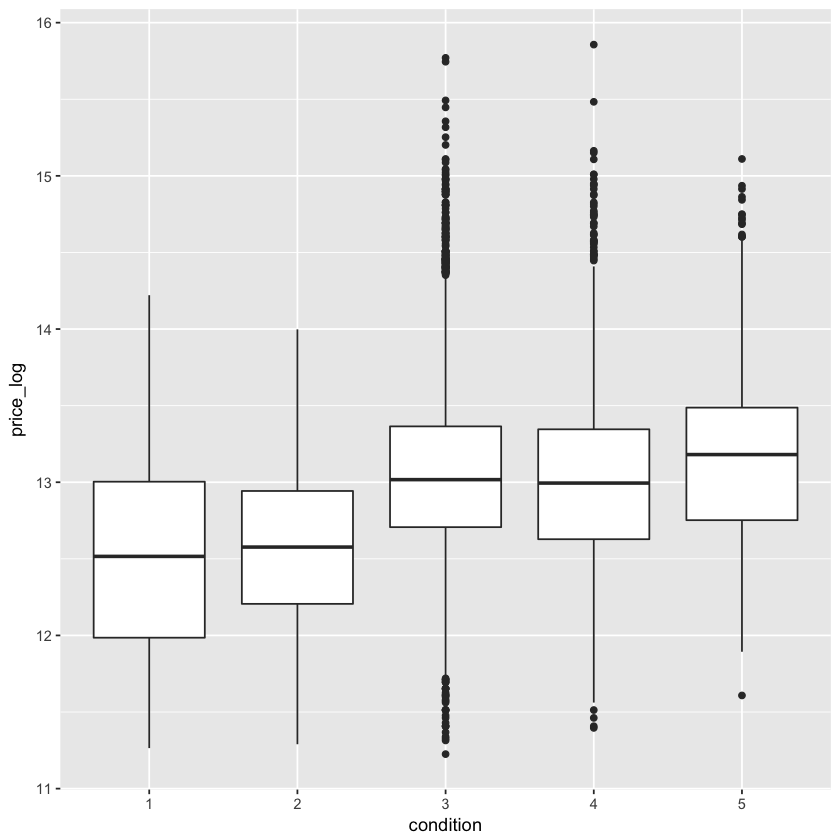

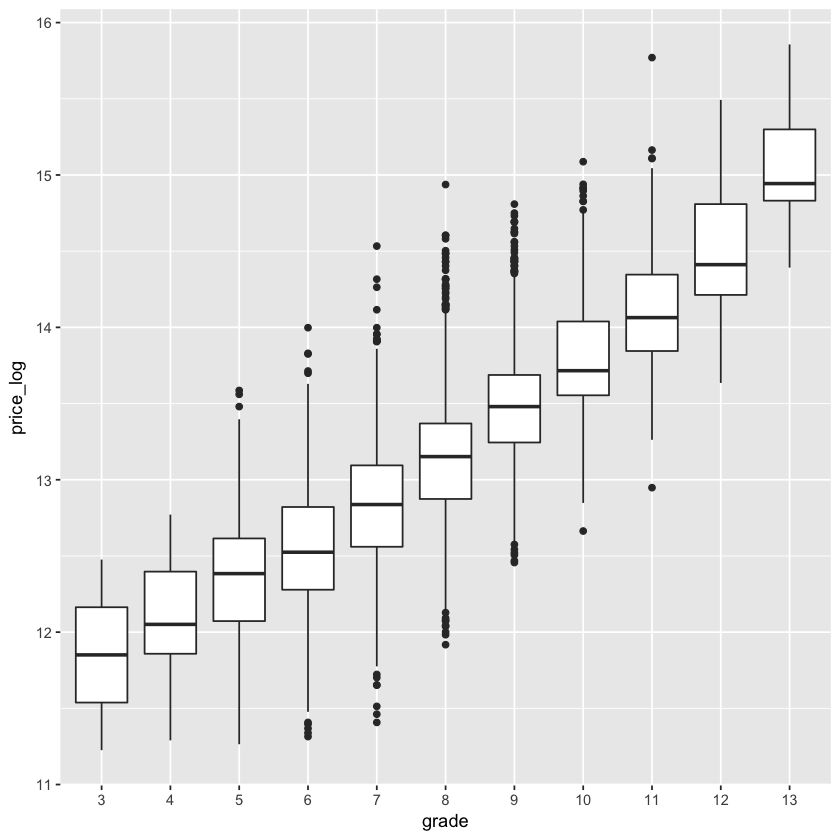

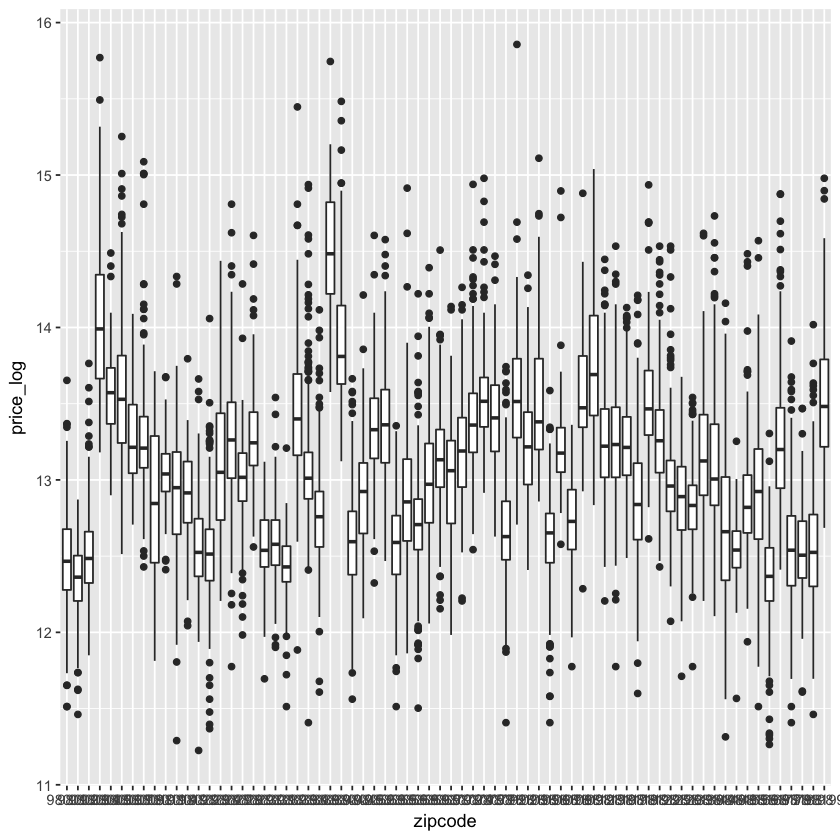

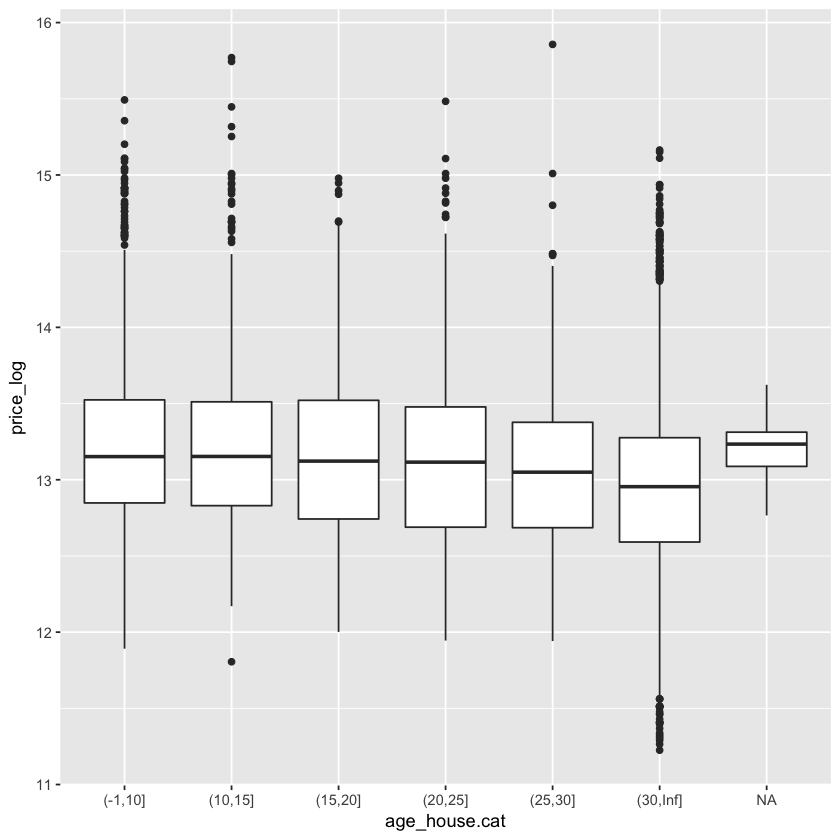

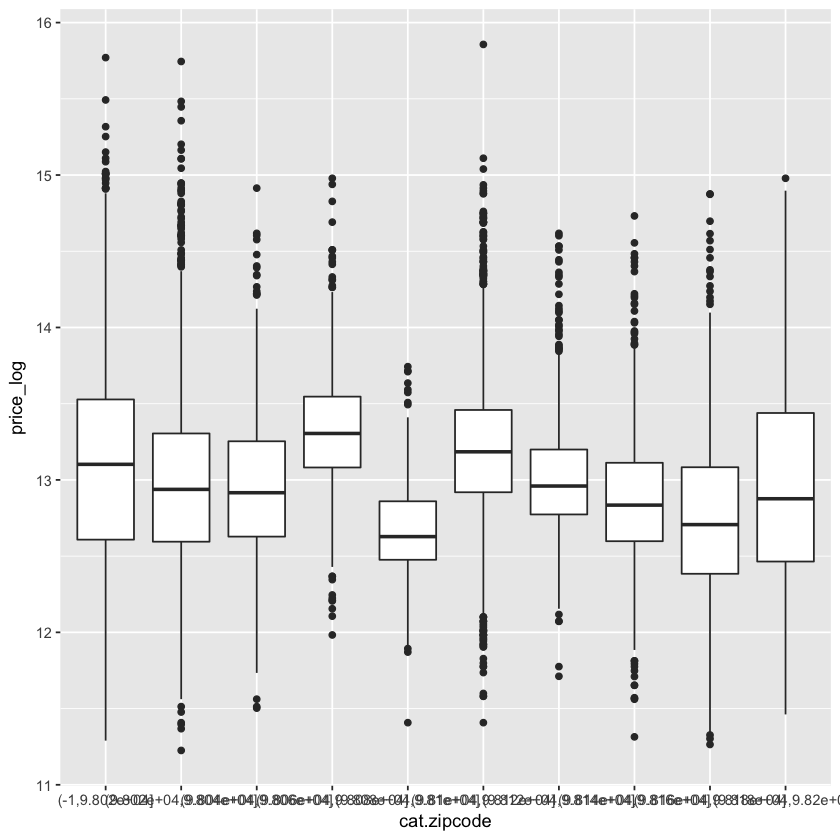

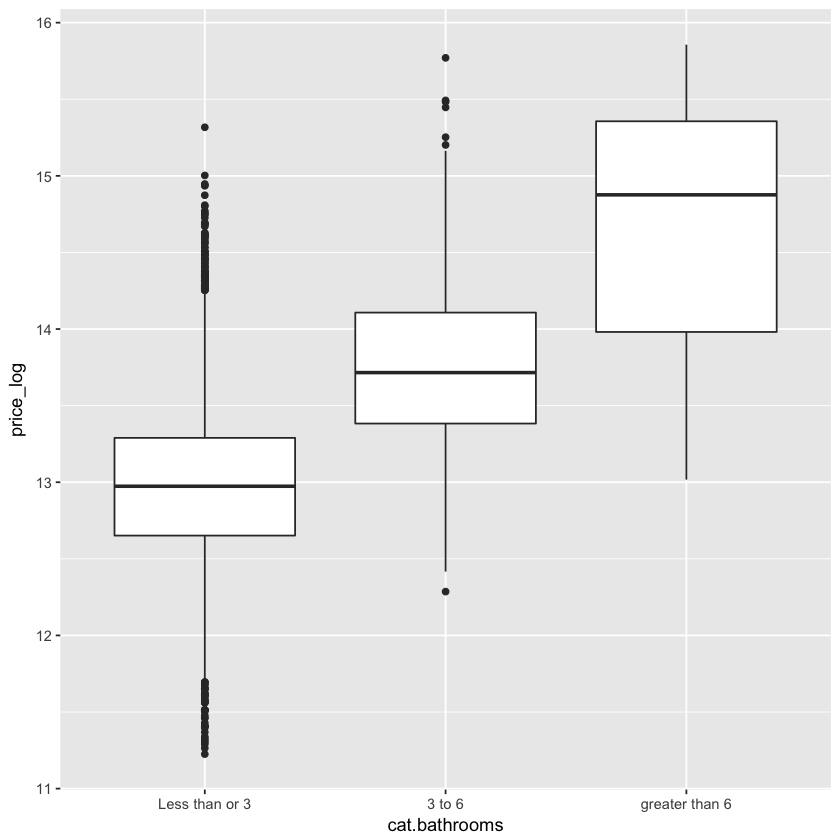

In [12]:
i = 1
tcols = ncol(train.data.file)
# colnames(train.data.file)[1]
for(i in 1:tcols){
    if(is.factor(train.data.file[,i])){
#         print("Yes")
#         print(colnames(train.data.file)[i])
        print(ggplot(train.data.file,aes_string(colnames(train.data.file)[i],"price_log"))+geom_boxplot())
    }
}

Treating zipcode variable

In [13]:
zipcode.price = as.data.frame(aggregate(x=train.data.file$price,by = list(train.data.file$zipcode), FUN = mean))
head(zipcode.price)
zipcode.price[order(zipcode.price$Group.1),]



Group.1 x        
1 98001    281432.9
2 98002    233786.0
3 98003    288745.4
4 98004   1411433.6
5 98005    811166.7
6 98006    866252.5

Group.1 x        
1  98001    281432.9
2  98002    233786.0
3  98003    288745.4
4  98004   1411433.6
5  98005    811166.7
6  98006    866252.5
7  98007    604373.3
8  98008    658850.4
9  98010    422160.4
10 98011    478275.5
11 98014    457861.6
12 98019    421268.5
13 98022    313867.8
14 98023    291239.6
15 98024    591144.6
16 98027    617573.8
17 98028    462778.5
18 98029    611817.8
19 98030    297289.1
20 98031    303268.1
21 98032    256560.2
22 98033    775023.1
23 98034    520483.7
24 98038    368065.9
25 98039   2257796.1
26 98040   1208408.2
27 98042    312853.3
28 98045    426298.9
29 98052    649207.7
30 98053    682836.1
⋮  ⋮       ⋮        
41 98092    337936.1
42 98102    908339.9
43 98103    579973.1
44 98105    839115.1
45 98106    315489.0
46 98107    573293.2
47 98108    350355.2
48 98109    858666.1
49 98112   1077018.2
50 98115    609390.7
51 98116    621805.4
52 98117    578964.9
53 98118    422539.1
54 98119    830642.8
55 98122    640648.3
56 98125    469886.8
57 98126    418785.6
58 98133    382422.1
59 98136    565523.4
60 98144    564820.1
61 98146    371032.0
62 98148    287119.8
63 98155    412460.9
64 98166    470645.9
65 98168    240763.9
66 98177    676401.6
67 98178    305178.4
68 98188    295141.3
69 98198    311663.9
70 98199    824625.3

Continous vs Traget Variable

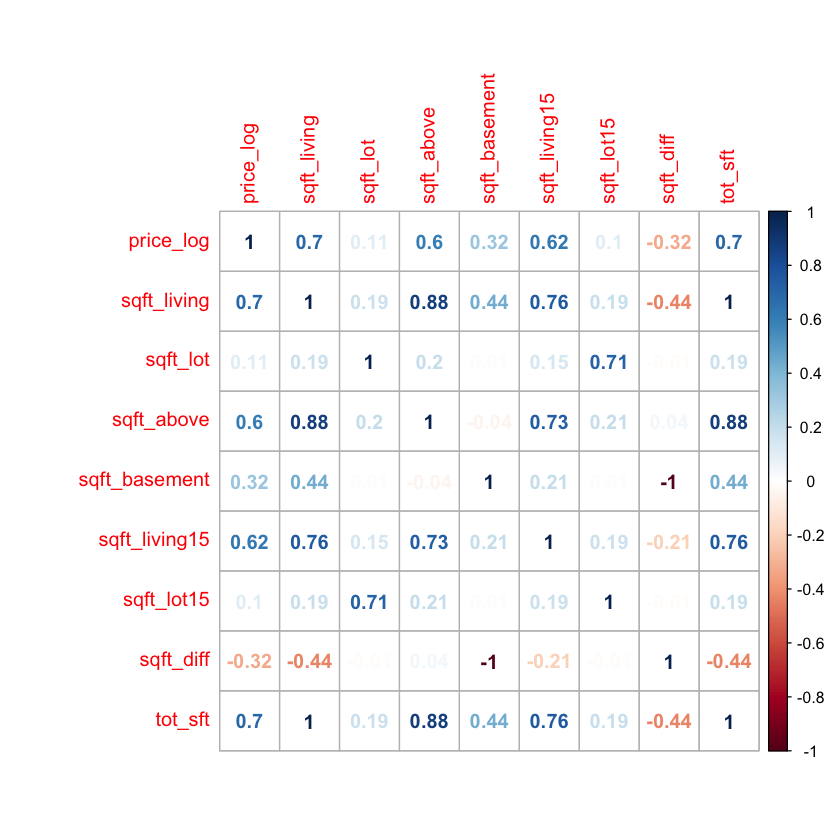

In [14]:
temp = train.data.file[,c('price_log','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15')]
temp$sqft_diff = temp$sqft_above-temp$sqft_living
temp$tot_sft = temp$sqft_living+temp$sqft_basement+temp$sqft_above
price.corplot = cor(temp)
corrplot(price.corplot, method="number")  
train.data.file$tot_sft = train.data.file$sqft_living+train.data.file$sqft_basement+train.data.file$sqft_above

## Linear Regression Model

In [15]:
# colnames(train.data.file)
lm1.train.data.file = train.data.file[,c("bedrooms","cat.bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm1  = lm(price_log~.,data = lm1.train.data.file)
summary(lm1)
gvlma::gvlma(lm1)



Call:
lm(formula = price_log ~ ., data = lm1.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33580 -0.23079  0.01245  0.22067  1.24612 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.139e+01  2.689e-01  42.350  < 2e-16 ***
bedrooms1                    1.957e-01  1.152e-01   1.699 0.089328 .  
bedrooms2                    2.155e-01  1.123e-01   1.918 0.055069 .  
bedrooms3                    1.013e-01  1.122e-01   0.903 0.366629    
bedrooms4                    9.079e-02  1.123e-01   0.809 0.418784    
bedrooms5                    1.007e-01  1.127e-01   0.893 0.371808    
bedrooms6                    7.443e-02  1.147e-01   0.649 0.516525    
bedrooms7                   -2.936e-02  1.319e-01  -0.223 0.823798    
bedrooms8                    2.510e-01  1.570e-01   1.598 0.109960    
bedrooms9                    3.656e-01  2.012e-01   1.817 0.069278 .  
bedrooms10                   5.181e-0


Call:
lm(formula = price_log ~ ., data = lm1.train.data.file)

Coefficients:
                (Intercept)                    bedrooms1  
                 11.3901132                    0.1956702  
                  bedrooms2                    bedrooms3  
                  0.2155094                    0.1012929  
                  bedrooms4                    bedrooms5  
                  0.0907927                    0.1006699  
                  bedrooms6                    bedrooms7  
                  0.0744262                   -0.0293646  
                  bedrooms8                    bedrooms9  
                  0.2509600                    0.3655581  
                 bedrooms10                   bedrooms11  
                  0.0518123                    0.2478173  
                 bedrooms33          cat.bathrooms3 to 6  
                  0.5284481                    0.0768576  
cat.bathroomsgreater than 6                      tot_sft  
                 -0.3148320          

In [16]:
# colnames(train.data.file)
lm2.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm2  = lm(price_log~.,data = lm2.train.data.file)
summary(lm2)
gvlma::gvlma(lm2)



Call:
lm(formula = price_log ~ ., data = lm2.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34854 -0.23205  0.01239  0.22143  1.25471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.140e+01  2.694e-01  42.317  < 2e-16 ***
bedrooms1    1.815e-01  1.155e-01   1.572 0.116021    
bedrooms2    1.991e-01  1.127e-01   1.767 0.077332 .  
bedrooms3    7.969e-02  1.126e-01   0.708 0.479199    
bedrooms4    6.771e-02  1.127e-01   0.601 0.548150    
bedrooms5    8.394e-02  1.132e-01   0.741 0.458497    
bedrooms6    5.557e-02  1.153e-01   0.482 0.629972    
bedrooms7   -5.348e-02  1.325e-01  -0.404 0.686499    
bedrooms8    2.401e-01  1.577e-01   1.523 0.127871    
bedrooms9    2.338e-01  2.000e-01   1.169 0.242383    
bedrooms10   4.146e-02  3.483e-01   0.119 0.905249    
bedrooms11   2.082e-01  3.474e-01   0.599 0.549050    
bedrooms33   5.083e-01  3.474e-01   1.463 0.143441    
bathrooms    1.939e-02  6.108e-03   3.174 0.0015


Call:
lm(formula = price_log ~ ., data = lm2.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
 11.3996828    0.1815290    0.1990518    0.0796945    0.0677099    0.0839377  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
  0.0555653   -0.0534839    0.2401151    0.2338490    0.0414623    0.2081657  
 bedrooms33    bathrooms      tot_sft    floors1.5      floors2    floors2.5  
  0.5083244    0.0193901    0.0001062    0.1767909   -0.0299575    0.1348317  
    floors3    floors3.5  waterfront1        view1        view2        view3  
  0.0896770    0.2063859    0.2930020    0.2470332    0.1422194    0.1760562  
      view4   condition2   condition3   condition4   condition5       grade4  
  0.3227003   -0.0466379    0.0384970    0.1049070    0.2332378    0.3076374  
     grade5       grade6       grade7       grade8       grade9      grade10  
  0.4500862    0.6155054    0.8501128    1.0523019   

In [17]:
# colnames(train.data.file)
lm3.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm3.train.data.file$bathrooms = as.factor(lm3.train.data.file$bathrooms)
lm3  = lm(price_log~.,data = lm3.train.data.file)
summary(lm3)
gvlma::gvlma(lm3)



Call:
lm(formula = price_log ~ ., data = lm3.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35923 -0.23207  0.01398  0.22025  1.26142 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.143e+01  2.690e-01  42.475  < 2e-16 ***
bedrooms1      4.829e-02  1.489e-01   0.324 0.745677    
bedrooms2      5.991e-02  1.481e-01   0.404 0.685914    
bedrooms3     -5.467e-02  1.481e-01  -0.369 0.712022    
bedrooms4     -6.475e-02  1.482e-01  -0.437 0.662086    
bedrooms5     -6.329e-02  1.485e-01  -0.426 0.669975    
bedrooms6     -9.578e-02  1.501e-01  -0.638 0.523408    
bedrooms7     -1.488e-01  1.642e-01  -0.906 0.364759    
bedrooms8      8.816e-02  1.851e-01   0.476 0.633841    
bedrooms9      2.208e-01  2.408e-01   0.917 0.359269    
bedrooms10    -1.061e-01  3.761e-01  -0.282 0.777773    
bedrooms11     2.983e-02  3.595e-01   0.083 0.933878    
bedrooms33     3.607e-01  3.593e-01   1.004 0.315449    
bathrooms0.5  -1.090


Call:
lm(formula = price_log ~ ., data = lm3.train.data.file)

Coefficients:
  (Intercept)      bedrooms1      bedrooms2      bedrooms3      bedrooms4  
   11.4272328      0.0482893      0.0599067     -0.0546655     -0.0647519  
    bedrooms5      bedrooms6      bedrooms7      bedrooms8      bedrooms9  
   -0.0632894     -0.0957820     -0.1488351      0.0881603      0.2207805  
   bedrooms10     bedrooms11     bedrooms33   bathrooms0.5  bathrooms0.75  
   -0.1061482      0.0298274      0.3606852     -0.1090367      0.2187550  
   bathrooms1  bathrooms1.25   bathrooms1.5  bathrooms1.75     bathrooms2  
    0.2660955      0.3581016      0.2592171      0.2910806      0.2870344  
bathrooms2.25   bathrooms2.5  bathrooms2.75     bathrooms3  bathrooms3.25  
    0.2780478      0.2305991      0.2973684      0.3181057      0.3383108  
 bathrooms3.5  bathrooms3.75     bathrooms4  bathrooms4.25   bathrooms4.5  
    0.3167315      0.4403071      0.3658040      0.3257403      0.2849398  
bathrooms4

In [18]:
# colnames(train.data.file)
lm4.train.data.file = train.data.file[,c("bedrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm4  = lm(price_log~.,data = lm4.train.data.file)
summary(lm4)
gvlma::gvlma(lm4)



Call:
lm(formula = price_log ~ ., data = lm4.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32777 -0.23114  0.01224  0.22098  1.24730 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.138e+01  2.694e-01  42.240  < 2e-16 ***
bedrooms1    2.017e-01  1.154e-01   1.749 0.080381 .  
bedrooms2    2.201e-01  1.125e-01   1.957 0.050424 .  
bedrooms3    1.047e-01  1.124e-01   0.932 0.351310    
bedrooms4    9.392e-02  1.125e-01   0.835 0.403747    
bedrooms5    1.127e-01  1.129e-01   0.999 0.318017    
bedrooms6    8.869e-02  1.149e-01   0.772 0.440149    
bedrooms7   -1.353e-02  1.320e-01  -0.103 0.918347    
bedrooms8    2.815e-01  1.572e-01   1.791 0.073380 .  
bedrooms9    2.846e-01  1.994e-01   1.427 0.153554    
bedrooms10   1.094e-01  3.478e-01   0.315 0.753094    
bedrooms11   2.391e-01  3.474e-01   0.688 0.491238    
bedrooms33   5.328e-01  3.474e-01   1.534 0.125171    
tot_sft      1.103e-04  2.837e-06  38.871  < 2e-


Call:
lm(formula = price_log ~ ., data = lm4.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
 11.3792313    0.2017041    0.2201438    0.1047490    0.0939159    0.1127329  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
  0.0886949   -0.0135273    0.2814884    0.2846393    0.1093961    0.2391182  
 bedrooms33      tot_sft    floors1.5      floors2    floors2.5      floors3  
  0.5327895    0.0001103    0.1749389   -0.0227618    0.1400353    0.1014978  
  floors3.5  waterfront1        view1        view2        view3        view4  
  0.2188229    0.2936050    0.2470407    0.1422588    0.1767035    0.3229475  
 condition2   condition3   condition4   condition5       grade4       grade5  
 -0.0463126    0.0407551    0.1057321    0.2362895    0.3203923    0.4595069  
     grade6       grade7       grade8       grade9      grade10      grade11  
  0.6250331    0.8636584    1.0684870    1.2696688   

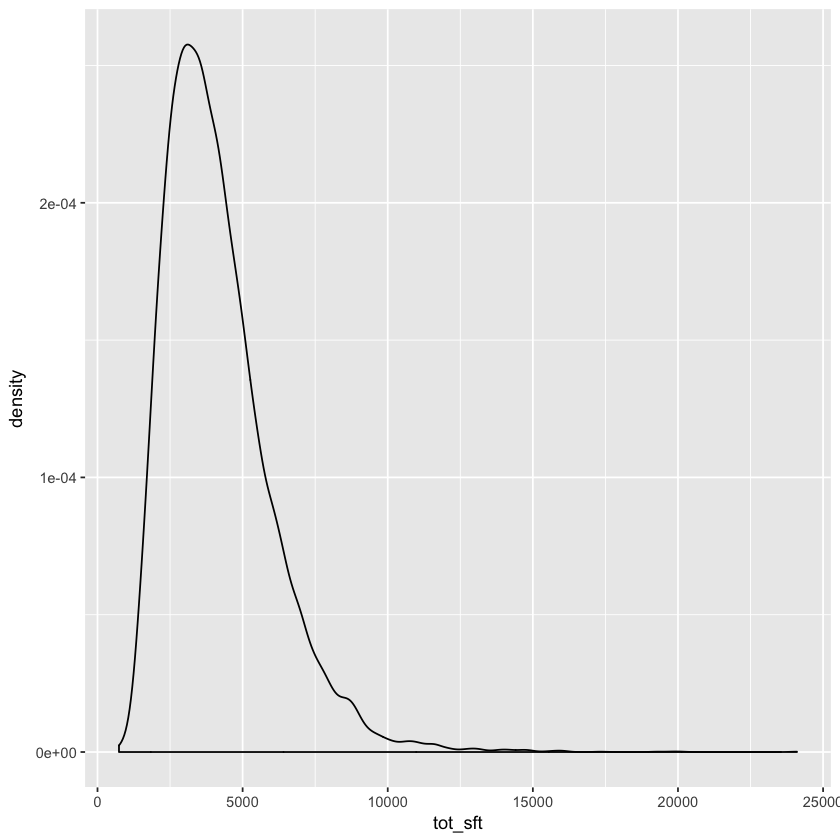


Call:
lm(formula = price_log ~ ., data = lm5.train.data.file)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2982 -0.2297  0.0120  0.2206  1.2395 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.256596   0.286819  28.787  < 2e-16 ***
bedrooms1      0.066224   0.148830   0.445 0.656353    
bedrooms2      0.025307   0.148066   0.171 0.864293    
bedrooms3     -0.119176   0.148035  -0.805 0.420804    
bedrooms4     -0.133719   0.148137  -0.903 0.366714    
bedrooms5     -0.119903   0.148487  -0.807 0.419392    
bedrooms6     -0.147182   0.150094  -0.981 0.326805    
bedrooms7     -0.222290   0.164217  -1.354 0.175872    
bedrooms8      0.037090   0.185056   0.200 0.841150    
bedrooms9      0.169622   0.240764   0.705 0.481124    
bedrooms10    -0.167703   0.375981  -0.446 0.655574    
bedrooms11    -0.030162   0.359396  -0.084 0.933117    
bedrooms33     0.292519   0.359150   0.814 0.415386    
bathrooms0.5  -0.052566   0.256209  -0.205 0


Call:
lm(formula = price_log ~ ., data = lm5.train.data.file)

Coefficients:
  (Intercept)      bedrooms1      bedrooms2      bedrooms3      bedrooms4  
     8.256596       0.066224       0.025307      -0.119176      -0.133719  
    bedrooms5      bedrooms6      bedrooms7      bedrooms8      bedrooms9  
    -0.119903      -0.147182      -0.222290       0.037090       0.169622  
   bedrooms10     bedrooms11     bedrooms33   bathrooms0.5  bathrooms0.75  
    -0.167703      -0.030162       0.292519      -0.052566       0.287606  
   bathrooms1  bathrooms1.25   bathrooms1.5  bathrooms1.75     bathrooms2  
     0.316471       0.338498       0.281279       0.299952       0.295905  
bathrooms2.25   bathrooms2.5  bathrooms2.75     bathrooms3  bathrooms3.25  
     0.283766       0.234271       0.307459       0.332756       0.375686  
 bathrooms3.5  bathrooms3.75     bathrooms4  bathrooms4.25   bathrooms4.5  
     0.354060       0.488557       0.438782       0.436459       0.387594  
bathrooms4

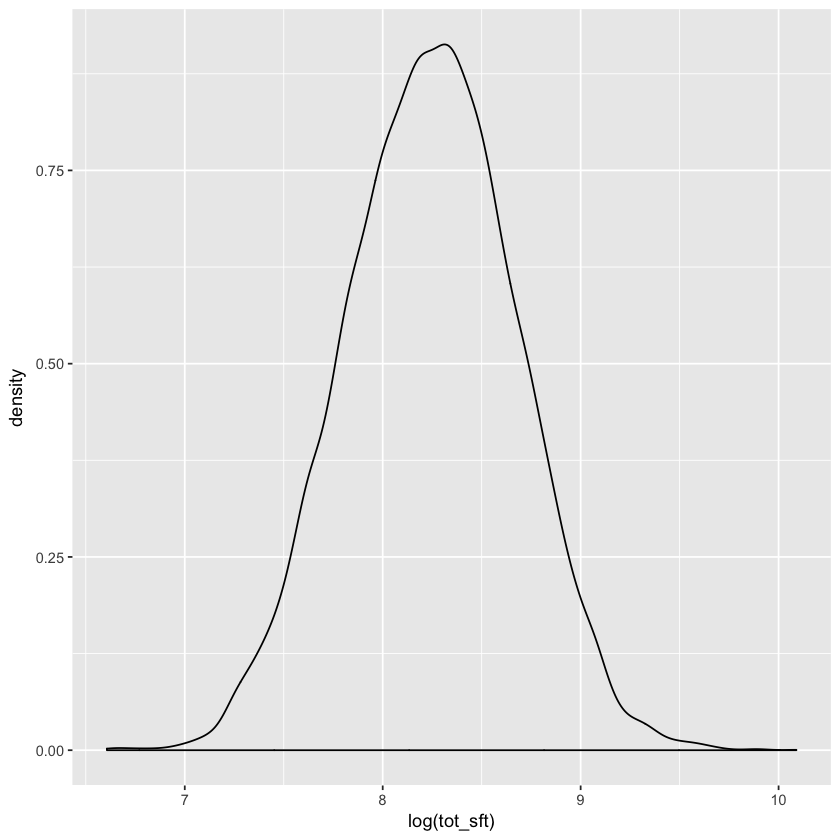

In [19]:
# colnames(train.data.file)
lm5.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
ggplot(lm5.train.data.file,aes(tot_sft))+geom_density()
ggplot(lm5.train.data.file,aes(log(tot_sft)))+geom_density()
lm5.train.data.file$log.tot_sft = log(lm5.train.data.file$tot_sft)
lm5.train.data.file$tot_sft = NULL
lm5.train.data.file$bathrooms = as.factor(lm5.train.data.file$bathrooms)
lm5  = lm(price_log~.,data = lm5.train.data.file)
summary(lm5)
gvlma::gvlma(lm5)
# 

Warning message:
“not plotting observations with leverage one:
  5544, 6186, 10200, 14887”

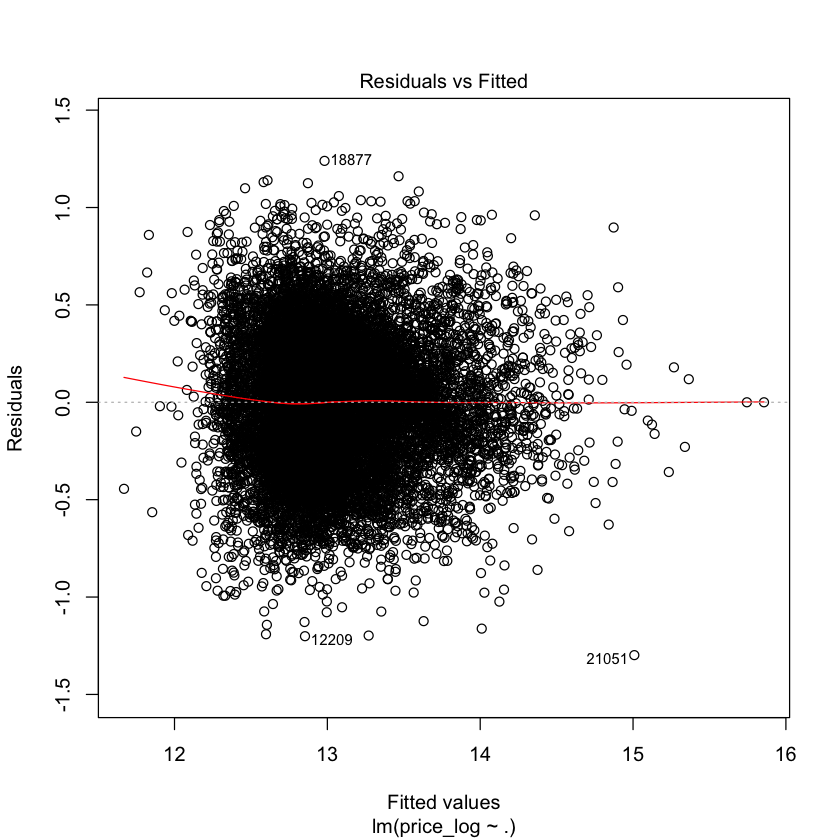

Warning message:
“not plotting observations with leverage one:
  5544, 6186, 10200, 14887”

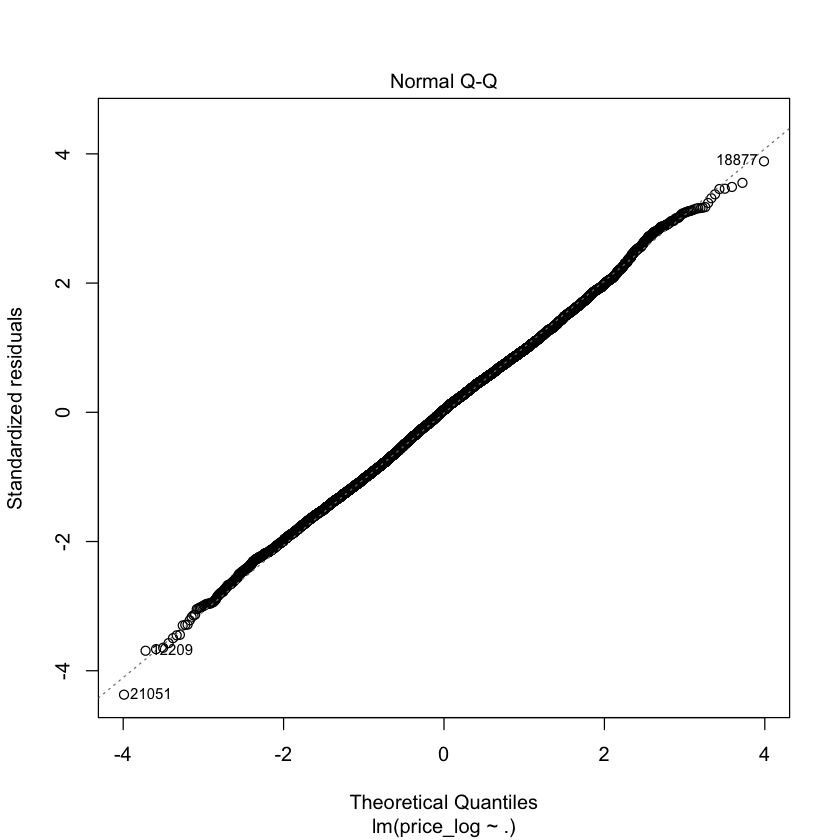

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

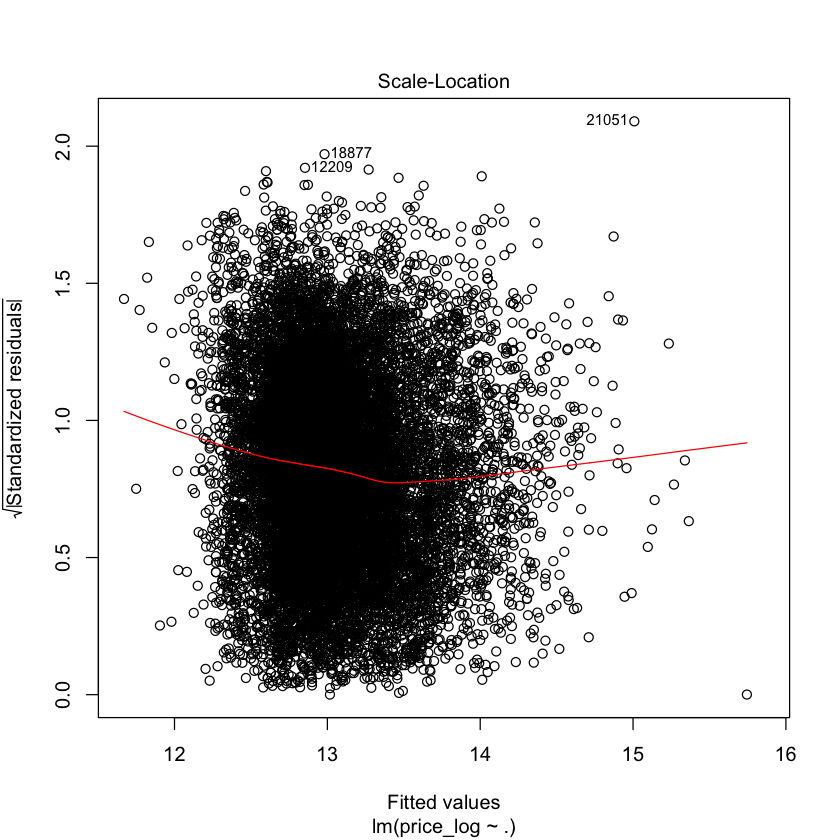

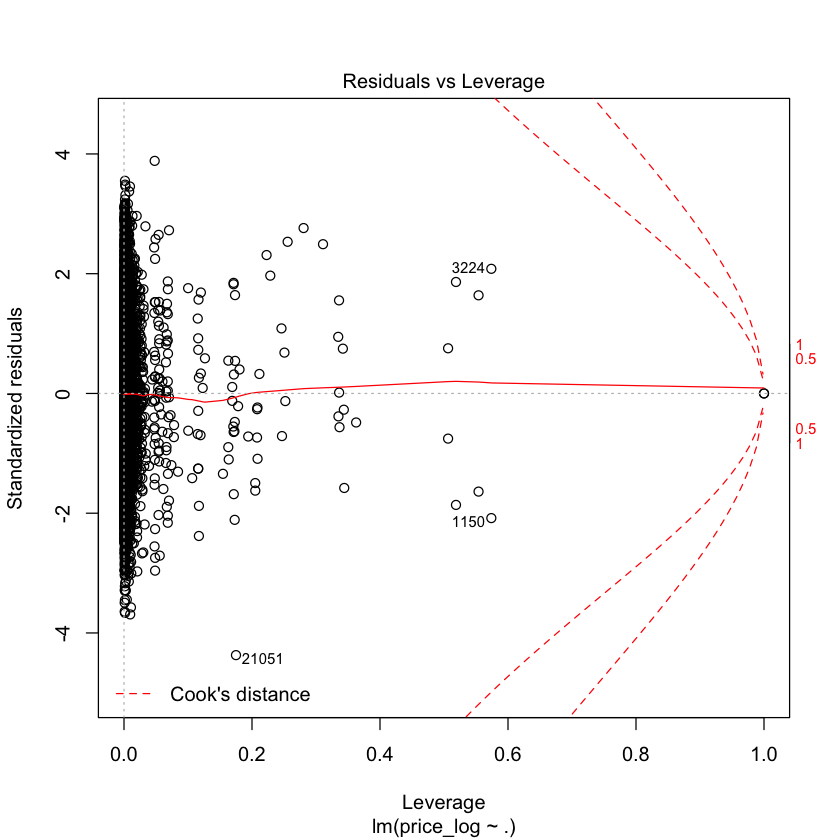

In [20]:
plot(lm5)

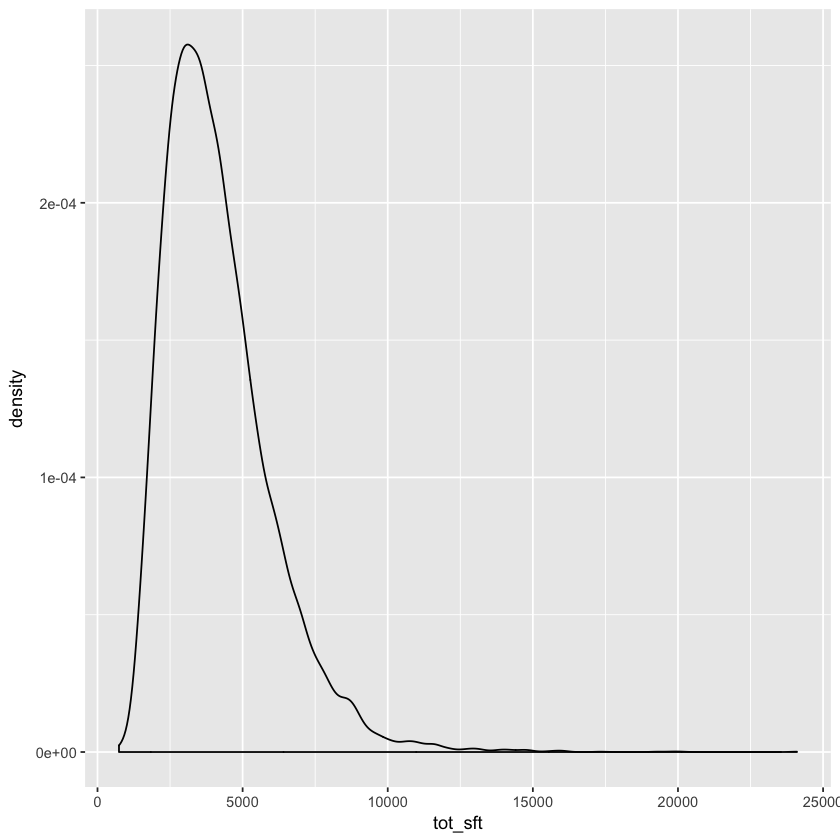


Call:
lm(formula = price_log ~ ., data = lm6.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18310 -0.10263  0.00182  0.10578  1.03812 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.067756   0.166033  48.591  < 2e-16 ***
bedrooms1     -0.114042   0.085514  -1.334 0.182353    
bedrooms2     -0.143889   0.085075  -1.691 0.090797 .  
bedrooms3     -0.163358   0.085048  -1.921 0.054780 .  
bedrooms4     -0.170837   0.085109  -2.007 0.044739 *  
bedrooms5     -0.199816   0.085314  -2.342 0.019188 *  
bedrooms6     -0.231596   0.086242  -2.685 0.007252 ** 
bedrooms7     -0.392395   0.094334  -4.160 3.21e-05 ***
bedrooms8     -0.278559   0.106362  -2.619 0.008828 ** 
bedrooms9     -0.295018   0.138689  -2.127 0.033421 *  
bedrooms10    -0.739463   0.215975  -3.424 0.000619 ***
bedrooms11    -0.009598   0.206551  -0.046 0.962937    
bedrooms33    -0.063988   0.206184  -0.310 0.756304    
zipcode98002  -0.034889   0.019416


Call:
lm(formula = price_log ~ ., data = lm6.train.data.file)

Coefficients:
  (Intercept)      bedrooms1      bedrooms2      bedrooms3      bedrooms4  
     8.067756      -0.114042      -0.143889      -0.163358      -0.170837  
    bedrooms5      bedrooms6      bedrooms7      bedrooms8      bedrooms9  
    -0.199816      -0.231596      -0.392395      -0.278559      -0.295018  
   bedrooms10     bedrooms11     bedrooms33   zipcode98002   zipcode98003  
    -0.739463      -0.009598      -0.063988      -0.034889       0.003662  
 zipcode98004   zipcode98005   zipcode98006   zipcode98007   zipcode98008  
     1.140235       0.735615       0.636641       0.659456       0.651602  
 zipcode98010   zipcode98011   zipcode98014   zipcode98019   zipcode98022  
     0.282319       0.454229       0.334012       0.345631       0.076358  
 zipcode98023   zipcode98024   zipcode98027   zipcode98028   zipcode98029  
    -0.023227       0.503494       0.519398       0.411616       0.574330  
 zipcode98

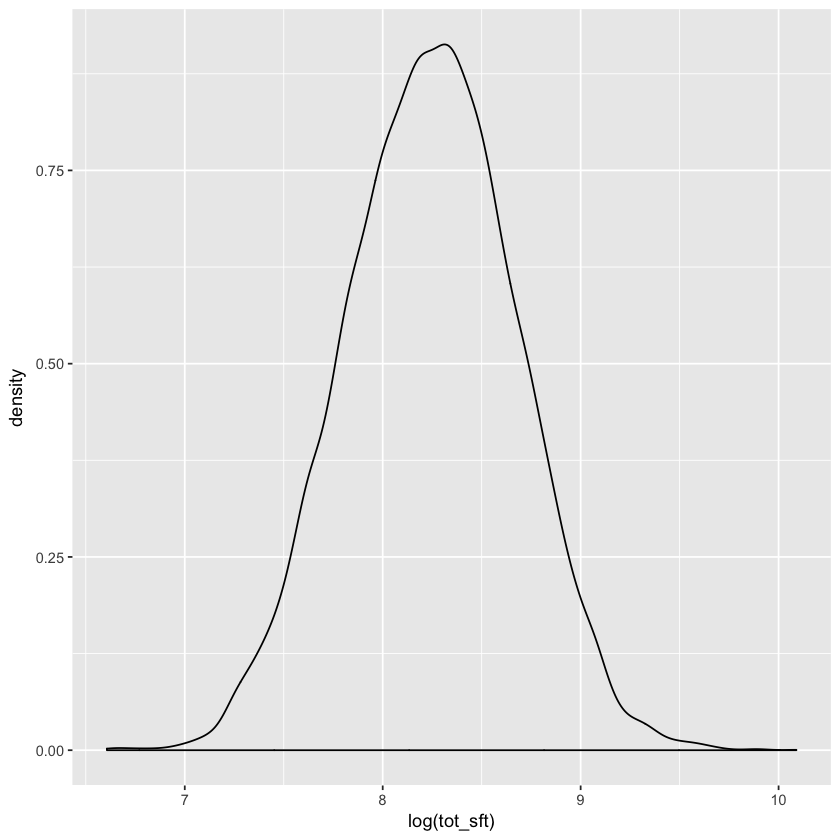

In [21]:
# colnames(train.data.file)
lm6.train.data.file = train.data.file[,c("bedrooms","zipcode","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm6.train.data.file$zipcode = as.factor(lm6.train.data.file$zipcode)
ggplot(lm6.train.data.file,aes(tot_sft))+geom_density()
ggplot(lm6.train.data.file,aes(log(tot_sft)))+geom_density()
lm6.train.data.file$log.tot_sft = log(lm6.train.data.file$tot_sft)
lm6.train.data.file$tot_sft = NULL
lm6.train.data.file$bathrooms = as.factor(lm6.train.data.file$bathrooms)
lm6  = lm(price_log~.,data = lm6.train.data.file)
summary(lm6)
gvlma::gvlma(lm6)
# 

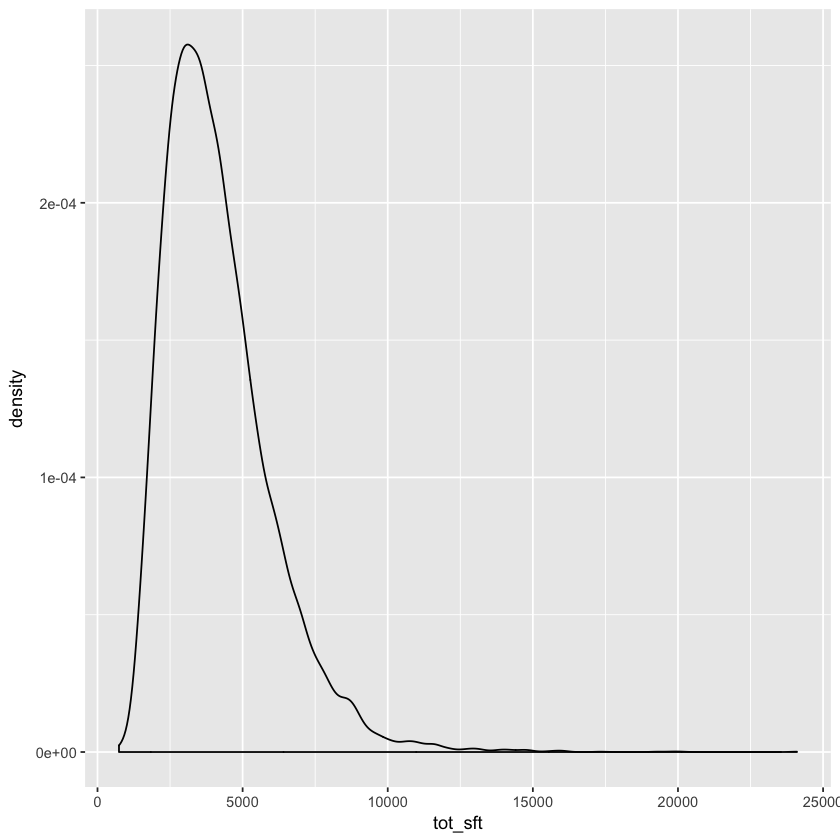


Call:
lm(formula = price_log ~ ., data = lm7.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25932 -0.23036  0.00424  0.21797  1.31007 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  8.2319392  0.2811483  29.280  < 2e-16 ***
bedrooms1                    0.2064380  0.1142196   1.807 0.070723 .  
bedrooms2                    0.1668116  0.1113826   1.498 0.134246    
bedrooms3                    0.0335318  0.1112527   0.301 0.763112    
bedrooms4                    0.0157873  0.1113858   0.142 0.887291    
bedrooms5                    0.0435012  0.1118155   0.389 0.697249    
bedrooms6                    0.0288304  0.1138028   0.253 0.800012    
bedrooms7                   -0.0692371  0.1307889  -0.529 0.596549    
bedrooms8                    0.2335514  0.1556795   1.500 0.133582    
bedrooms9                    0.2027326  0.1996282   1.016 0.309860    
bedrooms10                   0.173517


Call:
lm(formula = price_log ~ ., data = lm7.train.data.file)

Coefficients:
                (Intercept)                    bedrooms1  
                   8.231939                     0.206438  
                  bedrooms2                    bedrooms3  
                   0.166812                     0.033532  
                  bedrooms4                    bedrooms5  
                   0.015787                     0.043501  
                  bedrooms6                    bedrooms7  
                   0.028830                    -0.069237  
                  bedrooms8                    bedrooms9  
                   0.233551                     0.202733  
                 bedrooms10                   bedrooms11  
                   0.173518                     0.163586  
                 bedrooms33                      zipcode  
                   0.434354                     0.002453  
        cat.bathrooms3 to 6  cat.bathroomsgreater than 6  
                   0.112705          

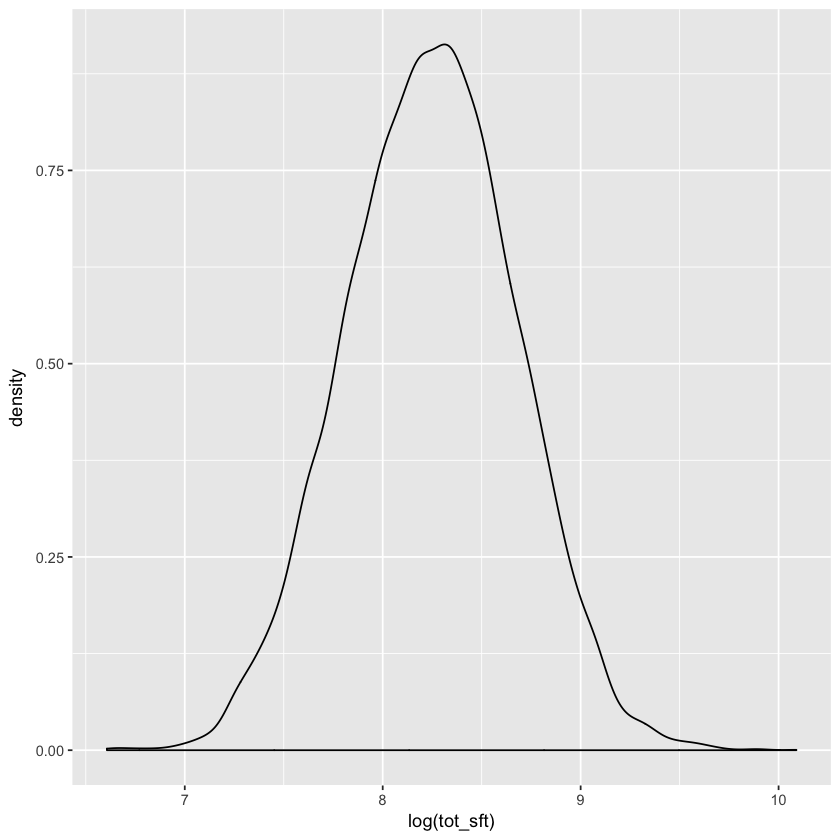

In [22]:
# colnames(train.data.file)
lm7.train.data.file = train.data.file[,c("bedrooms","zipcode","cat.bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm7.train.data.file$zipcode = as.numeric(lm7.train.data.file$zipcode)
ggplot(lm7.train.data.file,aes(tot_sft))+geom_density()
ggplot(lm7.train.data.file,aes(log(tot_sft)))+geom_density()
lm7.train.data.file$log.tot_sft = log(lm7.train.data.file$tot_sft)
lm7.train.data.file$tot_sft = NULL
# lm7.train.data.file$bathrooms = as.factor(lm7.train.data.file$bathrooms)
lm7  = lm(price_log~.,data = lm7.train.data.file)
summary(lm7)
gvlma::gvlma(lm7)

In [23]:
# colnames(train.data.file)
lm8.train.data.file = train.data.file[,c("bedrooms","cat.bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm8  = lm(price_log~.,data = lm8.train.data.file)
summary(lm8)
gvlma::gvlma(lm8)



Call:
lm(formula = price_log ~ ., data = lm8.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33580 -0.23079  0.01245  0.22067  1.24612 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.139e+01  2.689e-01  42.350  < 2e-16 ***
bedrooms1                    1.957e-01  1.152e-01   1.699 0.089328 .  
bedrooms2                    2.155e-01  1.123e-01   1.918 0.055069 .  
bedrooms3                    1.013e-01  1.122e-01   0.903 0.366629    
bedrooms4                    9.079e-02  1.123e-01   0.809 0.418784    
bedrooms5                    1.007e-01  1.127e-01   0.893 0.371808    
bedrooms6                    7.443e-02  1.147e-01   0.649 0.516525    
bedrooms7                   -2.936e-02  1.319e-01  -0.223 0.823798    
bedrooms8                    2.510e-01  1.570e-01   1.598 0.109960    
bedrooms9                    3.656e-01  2.012e-01   1.817 0.069278 .  
bedrooms10                   5.181e-0


Call:
lm(formula = price_log ~ ., data = lm8.train.data.file)

Coefficients:
                (Intercept)                    bedrooms1  
                 11.3901132                    0.1956702  
                  bedrooms2                    bedrooms3  
                  0.2155094                    0.1012929  
                  bedrooms4                    bedrooms5  
                  0.0907927                    0.1006699  
                  bedrooms6                    bedrooms7  
                  0.0744262                   -0.0293646  
                  bedrooms8                    bedrooms9  
                  0.2509600                    0.3655581  
                 bedrooms10                   bedrooms11  
                  0.0518123                    0.2478173  
                 bedrooms33          cat.bathrooms3 to 6  
                  0.5284481                    0.0768576  
cat.bathroomsgreater than 6                      tot_sft  
                 -0.3148320          

In [24]:
# colnames(train.data.file)
lm9.train.data.file = train.data.file[,c("cat.bathrooms","cat.zipcode","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm9  = lm(price_log~.,data = lm9.train.data.file)
summary(lm9)
gvlma::gvlma(lm9)



Call:
lm(formula = price_log ~ ., data = lm9.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33843 -0.19756  0.00709  0.19019  1.28552 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.162e+01  2.206e-01  52.657  < 2e-16 ***
cat.bathrooms3 to 6               2.075e-02  1.079e-02   1.924 0.054414 .  
cat.bathroomsgreater than 6      -3.989e-01  1.084e-01  -3.679 0.000235 ***
cat.zipcode(9.802e+04,9.804e+04] -5.861e-02  8.617e-03  -6.802 1.07e-11 ***
cat.zipcode(9.804e+04,9.806e+04] -8.954e-02  9.147e-03  -9.789  < 2e-16 ***
cat.zipcode(9.806e+04,9.808e+04]  3.734e-02  1.101e-02   3.393 0.000693 ***
cat.zipcode(9.808e+04,9.81e+04]  -3.884e-01  1.987e-02 -19.550  < 2e-16 ***
cat.zipcode(9.81e+04,9.812e+04]   2.920e-01  9.054e-03  32.255  < 2e-16 ***
cat.zipcode(9.812e+04,9.814e+04]  1.511e-01  1.093e-02  13.826  < 2e-16 ***
cat.zipcode(9.814e+04,9.816e+04]  3.034e-02  1.285e-02   2


Call:
lm(formula = price_log ~ ., data = lm9.train.data.file)

Coefficients:
                     (Intercept)               cat.bathrooms3 to 6  
                       11.615257                          0.020747  
     cat.bathroomsgreater than 6  cat.zipcode(9.802e+04,9.804e+04]  
                       -0.398902                         -0.058609  
cat.zipcode(9.804e+04,9.806e+04]  cat.zipcode(9.806e+04,9.808e+04]  
                       -0.089539                          0.037345  
 cat.zipcode(9.808e+04,9.81e+04]   cat.zipcode(9.81e+04,9.812e+04]  
                       -0.388419                          0.292023  
cat.zipcode(9.812e+04,9.814e+04]  cat.zipcode(9.814e+04,9.816e+04]  
                        0.151137                          0.030341  
cat.zipcode(9.816e+04,9.818e+04]   cat.zipcode(9.818e+04,9.82e+04]  
                       -0.139556                         -0.029466  
                         tot_sft                         floors1.5  
                        0

In [25]:
# colnames(train.data.file)
lm10.train.data.file = train.data.file[,c("age_house.cat","cat.bathrooms","cat.zipcode","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm10  = lm(price_log~.,data = lm10.train.data.file)
summary(lm10)
gvlma::gvlma(lm10)



Call:
lm(formula = price_log ~ ., data = lm10.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35890 -0.19472  0.00687  0.18962  1.27359 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.158e+01  2.202e-01  52.597  < 2e-16 ***
age_house.cat(10,15]              2.822e-03  1.068e-02   0.264 0.791682    
age_house.cat(15,20]             -2.926e-02  1.248e-02  -2.343 0.019123 *  
age_house.cat(20,25]             -5.993e-02  1.165e-02  -5.144 2.73e-07 ***
age_house.cat(25,30]             -1.208e-02  1.201e-02  -1.005 0.314791    
age_house.cat(30,Inf]             3.435e-02  9.468e-03   3.629 0.000286 ***
cat.bathrooms3 to 6               1.925e-02  1.088e-02   1.769 0.076972 .  
cat.bathroomsgreater than 6      -4.056e-01  1.081e-01  -3.750 0.000177 ***
cat.zipcode(9.802e+04,9.804e+04] -5.492e-02  8.605e-03  -6.382 1.80e-10 ***
cat.zipcode(9.804e+04,9.806e+04] -8.811e-02  9.139e-03  -


Call:
lm(formula = price_log ~ ., data = lm10.train.data.file)

Coefficients:
                     (Intercept)              age_house.cat(10,15]  
                      11.5793699                         0.0028220  
            age_house.cat(15,20]              age_house.cat(20,25]  
                      -0.0292552                        -0.0599338  
            age_house.cat(25,30]             age_house.cat(30,Inf]  
                      -0.0120764                         0.0343539  
             cat.bathrooms3 to 6       cat.bathroomsgreater than 6  
                       0.0192499                        -0.4055537  
cat.zipcode(9.802e+04,9.804e+04]  cat.zipcode(9.804e+04,9.806e+04]  
                      -0.0549180                        -0.0881123  
cat.zipcode(9.806e+04,9.808e+04]   cat.zipcode(9.808e+04,9.81e+04]  
                       0.0376018                        -0.3809870  
 cat.zipcode(9.81e+04,9.812e+04]  cat.zipcode(9.812e+04,9.814e+04]  
                       0

In [26]:
# colnames(train.data.file)
lm11.train.data.file = train.data.file[,c("age_house.cat","cat.bathrooms","sqft_living15","cat.zipcode","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm11  = lm(price_log~.,data = lm11.train.data.file)
summary(lm11)
gvlma::gvlma(lm11)



Call:
lm(formula = price_log ~ ., data = lm11.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30459 -0.19254  0.00591  0.18774  1.20850 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.137e+01  2.159e-01  52.683  < 2e-16 ***
age_house.cat(10,15]             -4.403e-03  1.047e-02  -0.420 0.674218    
age_house.cat(15,20]             -3.599e-02  1.224e-02  -2.941 0.003276 ** 
age_house.cat(20,25]             -6.492e-02  1.142e-02  -5.685 1.33e-08 ***
age_house.cat(25,30]             -1.206e-02  1.177e-02  -1.024 0.305617    
age_house.cat(30,Inf]             2.349e-02  9.287e-03   2.530 0.011428 *  
cat.bathrooms3 to 6               3.865e-02  1.069e-02   3.614 0.000302 ***
cat.bathroomsgreater than 6      -1.487e-01  1.065e-01  -1.397 0.162379    
sqft_living15                     1.518e-04  6.067e-06  25.021  < 2e-16 ***
cat.zipcode(9.802e+04,9.804e+04] -5.380e-02  8.432e-03  -


Call:
lm(formula = price_log ~ ., data = lm11.train.data.file)

Coefficients:
                     (Intercept)              age_house.cat(10,15]  
                       1.137e+01                        -4.403e-03  
            age_house.cat(15,20]              age_house.cat(20,25]  
                      -3.599e-02                        -6.492e-02  
            age_house.cat(25,30]             age_house.cat(30,Inf]  
                      -1.206e-02                         2.349e-02  
             cat.bathrooms3 to 6       cat.bathroomsgreater than 6  
                       3.865e-02                        -1.487e-01  
                   sqft_living15  cat.zipcode(9.802e+04,9.804e+04]  
                       1.518e-04                        -5.380e-02  
cat.zipcode(9.804e+04,9.806e+04]  cat.zipcode(9.806e+04,9.808e+04]  
                      -8.918e-02                         1.335e-02  
 cat.zipcode(9.808e+04,9.81e+04]   cat.zipcode(9.81e+04,9.812e+04]  
                      -3

In [27]:
# anova(lm1,lm2,lm3,lm4,lm5,lm6,lm7,lm8,lm9,lm10)

c(AIC(lm1),BIC(lm1))
c(AIC(lm2),BIC(lm2))
c(AIC(lm3),BIC(lm3))
c(AIC(lm4),BIC(lm4))
c(AIC(lm5),BIC(lm5))
c(AIC(lm6),BIC(lm6))
c(AIC(lm7),BIC(lm7))
c(AIC(lm8),BIC(lm8))
c(AIC(lm9),BIC(lm9))
c(AIC(lm10),BIC(lm10))

[1] 9251.112 9563.711

[1] 9291.873 9596.847

[1] 9195.815 9714.272

[1] 9299.972 9597.322

[1] 9183.870 9702.327

[1] -7582.854 -6538.316

[1] 8993.538 9313.762

[1] 9251.112 9563.711

[1] 6348.624 6638.350

[1] 6258.786 6586.602

## Predictions

In [28]:
pred.train.test= as.data.frame(train.data.file$price_log)
pred.train.test$train.act.price = train.data.file$price
colnames(pred.train.test)[1] = "train.act.log"
pred.train.test$train.pred.log = predict(lm11,train.data.file)
pred.train.test$train.pred.price = exp(pred.train.test$traint.pred.log)
pred.train.test$train.err = pred.train.test$train.pred.price - pred.train.test$train.act.price
pred.train.test$train.sqrderr = pred.train.test$train.err**2
head(pred.train.test)
myDT <- pred.train.test[!complete.cases(pred.train.test), ]
myDT

train.act.log train.act.price train.pred.log train.pred.price train.err 
1 12.80491       364000         13.02335        452863.6          88863.58
2 13.68198       875000         13.87523       1061533.7         186533.71
3 14.15689      1406890         13.78503        969984.1        -436905.95
4 13.21767       550000         13.09332        485688.1         -64311.92
5 14.03062      1240000         13.86884       1054775.6        -185224.38
6 12.69496       326100         12.22944        204728.8        -121371.16
  train.sqrderr
1   7896736730 
2  34794823743 
3 190886805821 
4   4136023584 
5  34308071054 
6  14730957675

train.act.log train.act.price train.pred.log train.pred.price train.err
276   13.62314      825000          NA             NA               NA       
316   12.76569      350000          NA             NA               NA       
923   13.32821      614285          NA             NA               NA       
4282  12.78549      357000          NA             NA               NA       
4649  13.29632      595000          NA             NA               NA       
6911  13.27937      585000          NA             NA               NA       
8352  13.59860      805000          NA             NA               NA       
9164  13.10216      490000          NA             NA               NA       
10742 13.12236      500000          NA             NA               NA       
10821 13.07317      476000          NA             NA               NA       
15067 13.23390      559000          NA             NA               NA       
      train.sqrderr
276   NA           
316   NA           
923   NA           
4282  NA           
4649  NA           
6911  NA           
8352  NA           
9164  NA           
10742 NA           
10821 NA           
15067 NA

## Error Metrics

In [29]:
mean(pred.train.test$train.sqrderr)

[1] NA